<a href="https://colab.research.google.com/github/FadyKamil15/optimization-algorithms-comparison/blob/main/sgdr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import time

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# Split training into 40,000 training and 10,000 validation
x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

# Shuffle the training data using NumPy
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

In [4]:
class LearningRateTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        self.lr_history = []

    def on_batch_end(self, batch, logs=None):
        # Get the current learning rate from the schedule
        lr = self.model.optimizer.learning_rate
        self.lr_history.append(lr)

In [5]:
lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=0.001,   # Set initial learning rate
    first_decay_steps=1000,        # Number of steps for the first restart
    t_mul=1,                       # Multiply the period after each restart
    m_mul=1,                       # Scaling factor for the learning rate
    alpha = 0.1
)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy', #labels are integers
              metrics=['accuracy'])

In [7]:
lr_tracker = LearningRateTracker()

start_time = time.time()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks = [lr_tracker]
)

end_time = time.time()

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1605 - loss: 2.2477 - val_accuracy: 0.2466 - val_loss: 2.1108
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2604 - loss: 2.0951 - val_accuracy: 0.2844 - val_loss: 2.0502
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2823 - loss: 2.0306 - val_accuracy: 0.2994 - val_loss: 2.0110
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3023 - loss: 1.9946 - val_accuracy: 0.3101 - val_loss: 1.9708
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3221 - loss: 1.9519 - val_accuracy: 0.3189 - val_loss: 1.9529
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3330 - loss: 1.9248 - val_accuracy: 0.3310 - val_loss: 1.9255
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3396 - loss: 1.9110 - val_accuracy: 0.3357 - val_loss: 1.9103
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3413 - loss: 1.8922 - val_accuracy: 0.

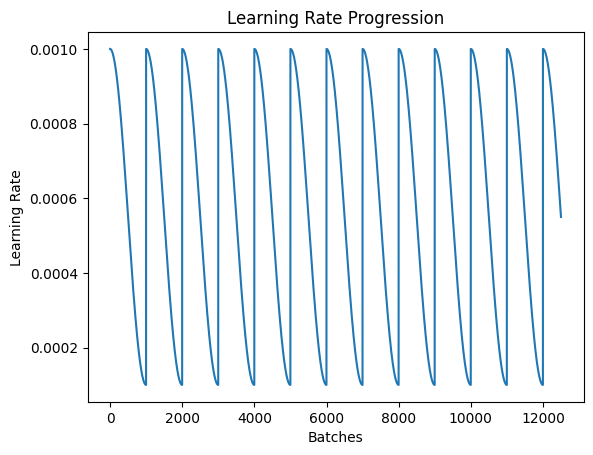

In [8]:
# Plot the learning rate history
plt.plot(lr_tracker.lr_history)
plt.title('Learning Rate Progression')
plt.xlabel('Batches')
plt.ylabel('Learning Rate')
plt.show()


Recall = TP / TP + FN
(Of all the items that truly belong to a specific class, how many were correctly predicted?)

Precision = TP / TP + FP
(Of all the items that the model predicted as a specific class, how many truly belong to that class?)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


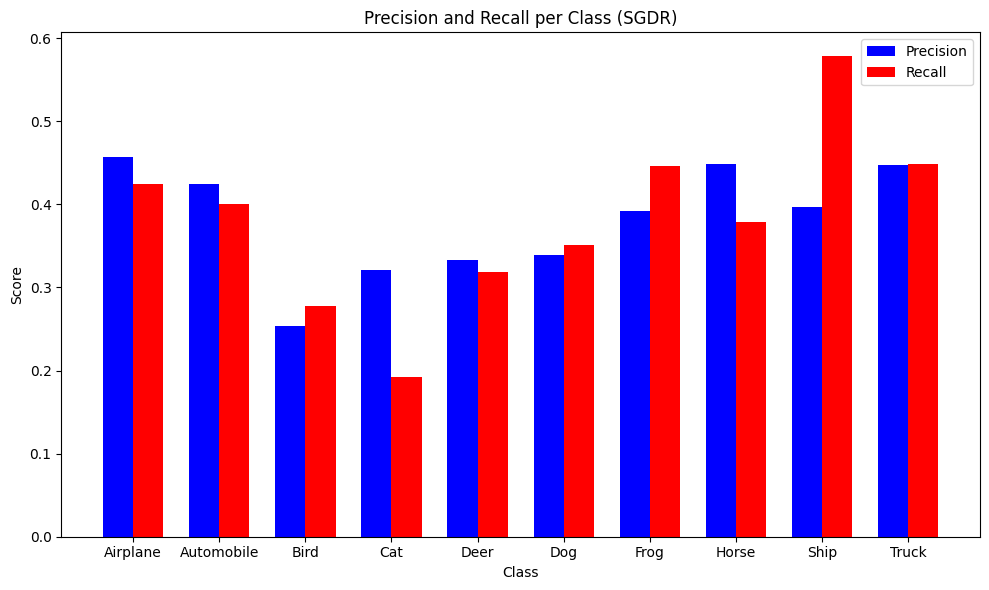

In [9]:
# Evaluate on test data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Get predictions (class indices)
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=-1)

# Calculate precision for each class using scikit-learn
precision_per_class = precision_score(y_test, predicted_labels, average=None)

# Calculate recall for each class
recall_per_class = recall_score(y_test, predicted_labels, average=None)

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Number of classes
num_classes = len(np.unique(y_test))

# Plotting precision and recall
x = np.arange(num_classes)  # the class labels

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # width of the bars

# Plot precision bars
ax.bar(x - width/2, precision_per_class, width, label='Precision', color='b')

# Plot recall bars
ax.bar(x + width/2, recall_per_class, width, label='Recall', color='r')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall per Class (SGDR)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()

Training time: 92.95537996292114 seconds


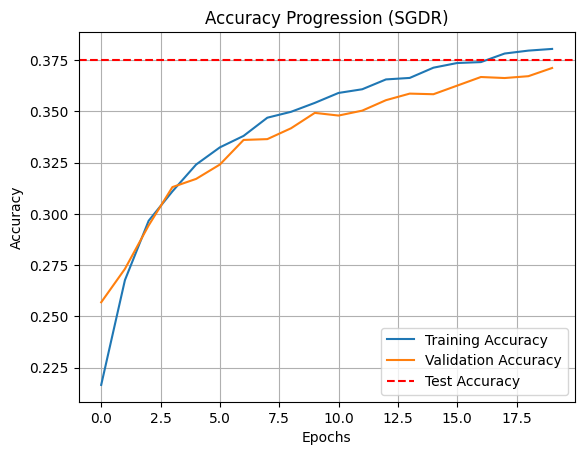

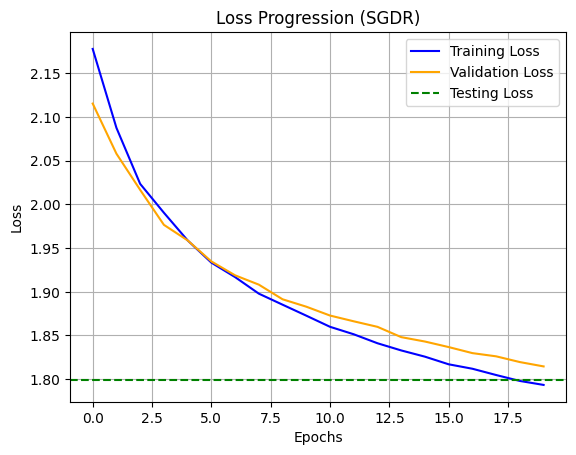

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


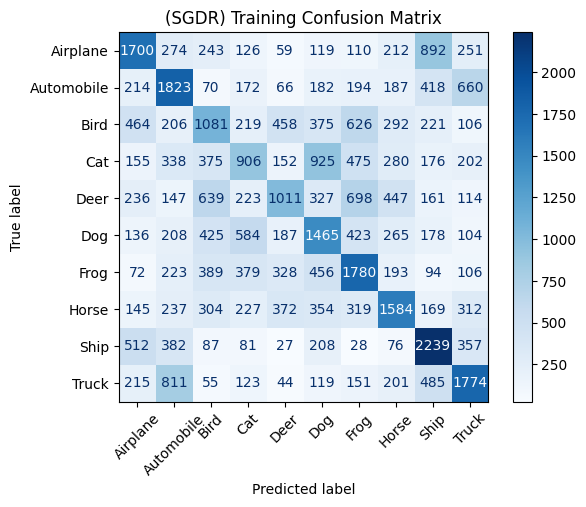

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


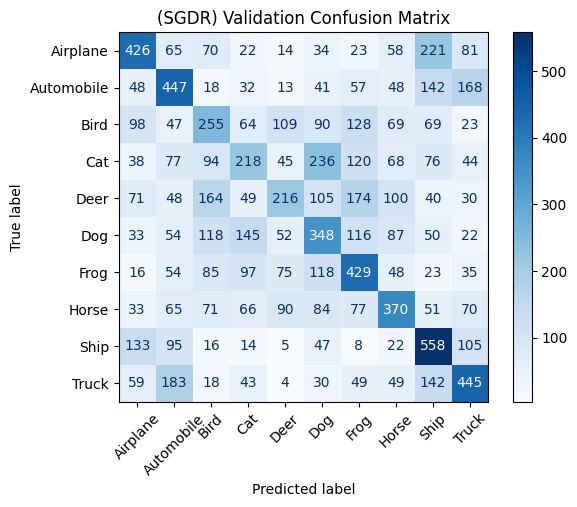

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


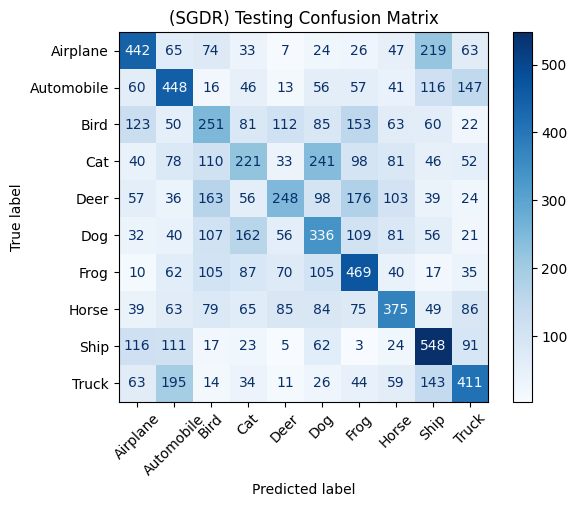

In [10]:
# Calculate the total training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Visualize training, validation, and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy Progression (SGDR)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plotting Training, Testing, and Validation Loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')


plt.axhline(y=test_loss, color='green', linestyle='--', label='Testing Loss')

plt.title('Loss Progression (SGDR)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Helper function to plot confusion matrices
def plot_confusion_matrix(data, labels, dataset_name):
    predictions = model.predict(data, batch_size=64)
    predicted_classes = np.argmax(predictions, axis=1)
    cm = confusion_matrix(labels, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.show()

# Plot confusion matrices for training, validation, and testing
plot_confusion_matrix(x_train, y_train, '(SGDR) Training')
plot_confusion_matrix(x_val, y_val, '(SGDR) Validation')
plot_confusion_matrix(x_test, y_test, '(SGDR) Testing')